# 7 합성곱 신경망(CNN)
## 7.1 전체구조

#### 완전연결 신경망과의 다른점
#### Affine -> ReLU : 완전연결 신경망
#### Conv -> ReLU -> Pooling

## 7.4.3 합성곱 계층 구현하기

In [1]:
import sys, os
import numpy as np
sys.path.append(os.pardir)
from common.util import im2col

x1=np.random.rand(1, 3, 7, 7) # input data : 데이터 수: 1, 채널 수 :3, 세로 가로 : 7
col1 = im2col(x1, 5, 5, stride=1, pad =0)
print(col1.shape)

x2 = np.random.rand(10,3, 7, 7)
col2 = im2col(x2, 5, 5, stride =1, pad =0)
print(col2.shape)


(9, 75)
(90, 75)


In [13]:
H = 3, W= 3,stride=1, pad =0
input_data = np.arange(1*2*3*3).reshape((1,2,3,3))
filter_h = 2, filter_w = 2
N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1
print(out_h)
print(out_w)

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
print(img)
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))
print(col)

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
print(y_max)
print(img[:, :, y:y_max:stride, x:x_max:stride])
print(col[:, :, y, x, :, :])
print(col)
col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
print(col)

2
2
[[[[ 0  1  2]
   [ 3  4  5]
   [ 6  7  8]]

  [[ 9 10 11]
   [12 13 14]
   [15 16 17]]]]
[[[[[[0. 0.]
     [0. 0.]]

    [[0. 0.]
     [0. 0.]]]


   [[[0. 0.]
     [0. 0.]]

    [[0. 0.]
     [0. 0.]]]]



  [[[[0. 0.]
     [0. 0.]]

    [[0. 0.]
     [0. 0.]]]


   [[[0. 0.]
     [0. 0.]]

    [[0. 0.]
     [0. 0.]]]]]]
3
[[[[ 4  5]
   [ 7  8]]

  [[13 14]
   [16 17]]]]
[[[[ 4.  5.]
   [ 7.  8.]]

  [[13. 14.]
   [16. 17.]]]]
[[[[[[ 0.  1.]
     [ 3.  4.]]

    [[ 1.  2.]
     [ 4.  5.]]]


   [[[ 3.  4.]
     [ 6.  7.]]

    [[ 4.  5.]
     [ 7.  8.]]]]



  [[[[ 9. 10.]
     [12. 13.]]

    [[10. 11.]
     [13. 14.]]]


   [[[12. 13.]
     [15. 16.]]

    [[13. 14.]
     [16. 17.]]]]]]
[[ 0.  1.  3.  4.  9. 10. 12. 13.]
 [ 1.  2.  4.  5. 10. 11. 13. 14.]
 [ 3.  4.  6.  7. 12. 13. 15. 16.]
 [ 4.  5.  7.  8. 13. 14. 16. 17.]]


In [13]:
 img = np.pad(x1, [(0,0), (0,0), (1, 1), (1, 1)], 'constant')
print(img)

[[[[0.         0.         0.         0.         0.         0.
    0.         0.         0.        ]
   [0.         0.32264774 0.84763797 0.94800891 0.59915087 0.83739617
    0.64428584 0.87952552 0.        ]
   [0.         0.34652863 0.18223796 0.13585619 0.62497646 0.40139099
    0.29987387 0.71901111 0.        ]
   [0.         0.57007403 0.19231514 0.85397954 0.42195431 0.50007934
    0.03669608 0.95872088 0.        ]
   [0.         0.40816708 0.72771553 0.2105156  0.1682018  0.5656177
    0.9368256  0.10820918 0.        ]
   [0.         0.89417535 0.03439244 0.11792981 0.66772536 0.32588668
    0.06547063 0.18350178 0.        ]
   [0.         0.14335637 0.24369782 0.78760943 0.35135158 0.95880208
    0.95884634 0.74233461 0.        ]
   [0.         0.37045776 0.64789599 0.37666027 0.76818496 0.17951963
    0.98928655 0.89746357 0.        ]
   [0.         0.         0.         0.         0.         0.
    0.         0.         0.        ]]

  [[0.         0.         0.         0.    

In [14]:
class Convolution:
    def __init__(self, W, b, stride =1, pad =0):
        self.W = W
        self.b = b 
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1+(H+2*self.pad -FH) / self.stride)
        out_w = int(1+(H+2*self.pad - FW)/ self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1)
        out = np. dot(col,col_W) +self.b
        
        out = out.reshape(N,out_h, out_w, -1).transpose(0,3,1,2)
        
        return out
    

### 위 class에서 사용된 것
### transpose; 2차원배열의 transpose는 아주 쉽지만 2 이상의 차원에서의 transpose는 생각하기어렵다.
### Ex)

In [29]:
c =np.array([[[1,5,9], [2,6,10]], [[3,7,11], [4,8,12]]])
print(c)
k = c.transpose(2,0,1)
print(k)
l = c.transpose(2,1,0)
print(l)
# 0차원 원소 3개씩 2개로 이루어진 1차원 2개 
# 1차원이 3개로,,, 원소 수 는 2개로 


[[[ 1  5  9]
  [ 2  6 10]]

 [[ 3  7 11]
  [ 4  8 12]]]
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]
[[[ 1  3]
  [ 2  4]]

 [[ 5  7]
  [ 6  8]]

 [[ 9 11]
  [10 12]]]


In [24]:
a = np.array([[1,2,3], [4,5,6]]) #2차원 배열
b = a.transpose(1,0)
print(a)
print(b)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


In [30]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride =1, pad =0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad= pad
        
    def forward(self,x):
        N,C,H,W = x.shape
        out_h = int(1+(H-self.pool_h)/ self.stride)
        out_w = int(1+(h-self.pool_w)/ self.stride)
        
        # 입력데이터를 전개
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self,pad)
        col = col.reshape(-1, self,pool_h * self.pool_w)
        # "행"별 최댓값 찾기 ( axis =1)
        out = np.max(col, axis=1)
        # 적절한 모양으로 reshape
        out = out.reshape(N, out_h, out_w, C).transpose(0,3,1,2)
        return out

## 7.5 CNN구현하기

- CNN의 네트워크는 convolution > ReLU > pooling > conv> ... > Affine > ReLU > Affine > Softmax
- input_dim: 입력데이터의 차원 (채널 수, 높이, 너비)
- conv_param: 하이퍼파라미터(딕셔너리). 딕셔너리의 키는 필터 수, 필터 크기, 스트라이드, 은닉층 수, 출력층 수, 초기화시 가중치 표준편차.


In [1]:
from collections import OrderedDict
from common.layers import *

class ReLU:
    def __init__(self):
        self.mask = None
    def forward(self,x):
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask] =0
        return out
    def backward(self, dout):
        dout[self.mask] =0
        dx = dout
        return dx

class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num': 30, 'filter_size':5, 'pad':0, 'stride':1}, hidden_size = 100, output_size =10, weight_init_std = 0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride +1 
        pool_output_size = int(filter_num * (conv_output_size/2) *(conv_output_size/2))
        
        # 가중치 매개변수 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        #CNN을 구성하는 계층들을 생성한다. 
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['ReLU1'] = ReLU()
        self.layers['Pool1'] = Pooling(pool_h =2, pool_w =2, stride =2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['ReLU'] = ReLU()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        
        self.last_layer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    def loss(self, x, t):
        y= self.predict(x)
        return self.last_layer.forward(y,t)
    
    def gradient(self, x, t):
        self.loss(x,t)
        
        dout =1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        grads ={}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db
        
        return grads
    
    ## 책 말고 필요한 함수가 많음
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]
            
    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

train loss:2.3003629085034465
=== epoch:1, train acc:0.239, test acc:0.228 ===
train loss:2.2979776976870196
train loss:2.2956214834989153
train loss:2.290254377796724
train loss:2.282980761786826
train loss:2.2764957528020573
train loss:2.2614345611089486
train loss:2.2262899664037463
train loss:2.223473246142177
train loss:2.2235692634122977
train loss:2.19250943978051
train loss:2.1475014318281525
train loss:2.1168334478709405
train loss:2.0413216865155963
train loss:1.997057016732293
train loss:1.9856034443171515
train loss:1.9156820727085306
train loss:1.840516877533316
train loss:1.7674973134149101
train loss:1.6965087892704316
train loss:1.6338623094848628
train loss:1.4221349120230462
train loss:1.416214950519128
train loss:1.3280232062902255
train loss:1.2330316904454823
train loss:1.2407946015180253
train loss:1.0583588325382056
train loss:0.9341534581936959
train loss:0.976996627068311
train loss:0.9066706167097125
train loss:0.9562720184600493
train loss:0.8778361073902957


train loss:0.2302872730720763
train loss:0.2237848752272504
train loss:0.23521460546675876
train loss:0.2574745605647042
train loss:0.11593544419153917
train loss:0.2508492323439637
train loss:0.31660735178719246
train loss:0.17755758308099676
train loss:0.3034242261169522
train loss:0.176560869316022
train loss:0.244376032182736
train loss:0.29952187346604
train loss:0.3373449241257241
train loss:0.16822916871201116
train loss:0.2209282997953477
train loss:0.19186678176856625
train loss:0.23315922152054733
train loss:0.28556214218854786
train loss:0.21259446978867685
train loss:0.25615903440680865
train loss:0.18730372443821622
train loss:0.29151361838170803
train loss:0.19456886276055024
train loss:0.2371059980880174
train loss:0.21204321350659858
train loss:0.2006682818319074
train loss:0.2540807337325415
train loss:0.07490287689937439
train loss:0.18816504797844558
train loss:0.22220044933624816
train loss:0.3136887432247311
train loss:0.21997064774084749
train loss:0.2243288464791

train loss:0.11675967720485732
train loss:0.12600510956401642
train loss:0.04390722753137429
train loss:0.10396017445252415
train loss:0.17865839964259286
train loss:0.14243147243191215
train loss:0.07510518712337051
train loss:0.118848497545165
train loss:0.13930219876118527
train loss:0.15289625737870696
train loss:0.04839694735318988
train loss:0.18762418027186623
train loss:0.09977642690783155
train loss:0.14047869194108395
train loss:0.054083244874698726
train loss:0.10773054878223583
train loss:0.055104849472766636
train loss:0.13150383434269114
train loss:0.14587702262756377
train loss:0.117592398822368
train loss:0.1030351933641028
train loss:0.11674618296341059
train loss:0.09229441174398043
train loss:0.11624067893613932
train loss:0.08183236923252755
train loss:0.10634034012502465
train loss:0.04972175267511817
train loss:0.06737971344156596
train loss:0.08889825996941993
train loss:0.1220864714946534
train loss:0.0886183108776462
train loss:0.17625629052883865
train loss:0.

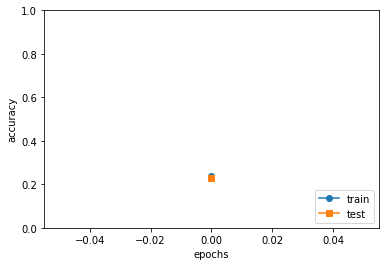

In [3]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 1 #원래 설정된 값은 20. 컴터 터질것같아서 1로 수정

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
